In [1]:
pip install git+https://github.com/marciogameiro/CMGDB_utils.git

  Cloning https://github.com/marciogameiro/CMGDB_utils.git to /private/var/folders/1k/xjqyqh5j4lb7wbs_9012tmbm0000gn/T/pip-req-build-a8n7z5mn
  Running command git clone --filter=blob:none --quiet https://github.com/marciogameiro/CMGDB_utils.git /private/var/folders/1k/xjqyqh5j4lb7wbs_9012tmbm0000gn/T/pip-req-build-a8n7z5mn
  Resolved https://github.com/marciogameiro/CMGDB_utils.git to commit d07c9bac117b4cda8a95bce5fa39b5849d1b4f3c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3.9 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from src.grid import Boxes
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, Matern
from sklearn.gaussian_process import GaussianProcessRegressor
import CMGDB_utils

### Load data

In [16]:
# init_data_file = 'data/vp_ic11all.dat'
# next_data_file = 'data/vp_next11all.dat'

init_data_file = 'data/vel_phase_ic.dat'
next_data_file = 'data/vel_phase_next.dat'

init_data = np.loadtxt(init_data_file)
next_data = np.loadtxt(next_data_file)

X = init_data[:, [0, 1]]
Y = next_data[:, [0, 1]]

init_impact_phase = init_data[:, 0]
init_impact_velocity = init_data[:, 1]
next_impact_phase = Y[:, 0]
next_impact_velocity = Y[:, 1]

In [4]:
plot_data = True

### Plot initial conditions (first impact) and next conditions (second impact)

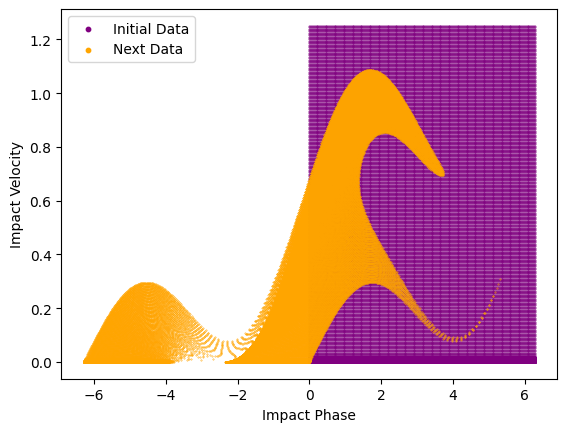

In [5]:
if plot_data: 
    plt.scatter(X[:,0], X[:,1], c='purple', s = 0.1, label='Initial Data')
    plt.scatter(Y[:,0], Y[:,1], c='orange', s = 0.1, label='Next Data')
    plt.xlabel('Impact Phase')
    plt.ylabel('Impact Velocity')
    plt.legend(markerscale=10)

### Phase surface

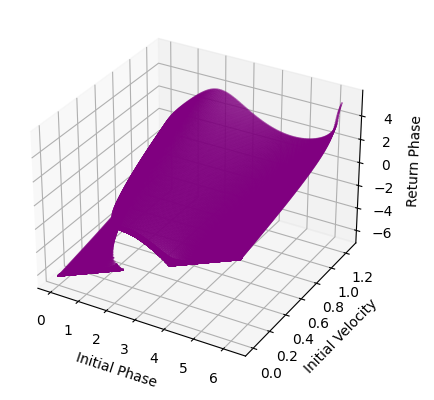

In [6]:
if plot_data:    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('Initial Phase')
    ax.set_ylabel('Initial Velocity')
    ax.set_zlabel('Return Phase')
    ax.scatter(X[:,0], X[:,1], next_impact_phase, c='purple', s=0.1)

### Mod the phase variable by $6.2828711 \approx 2 \pi$

In [7]:
# if not plot_data:
#     Y[:, 0] = Y[:, 0] % (6.2828711)
# next_impact_phase = Y[:, 0]

### Plot initial conditions (first impact) and next conditions (second impact)

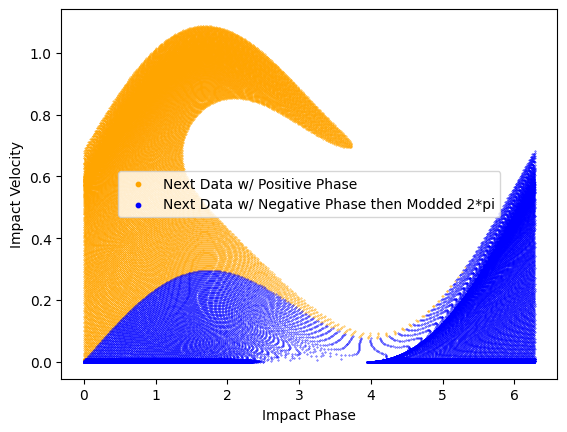

In [8]:
phase_max = 6.2828711

if plot_data: 
   pos_next = np.where(Y[:,0] > 0)
   neg_next = np.where(Y[:,0] < 0)
   plt.scatter(Y[pos_next,0], Y[pos_next,1], c='orange', s = 0.1, label='Next Data w/ Positive Phase')

   # mod the phase variable by 6.275
   Y[:, 0] = Y[:, 0] % (phase_max)
   plt.scatter(Y[neg_next,0], Y[neg_next,1], c='blue', s = 0.1, label='Next Data w/ Negative Phase then Modded 2*pi')


   plt.xlabel('Impact Phase')
   plt.ylabel('Impact Velocity')
   plt.legend(markerscale=10)
   
Y[:, 0] = Y[:, 0] % (6.2828711)
next_impact_phase = Y[:, 0]

### Phase surface

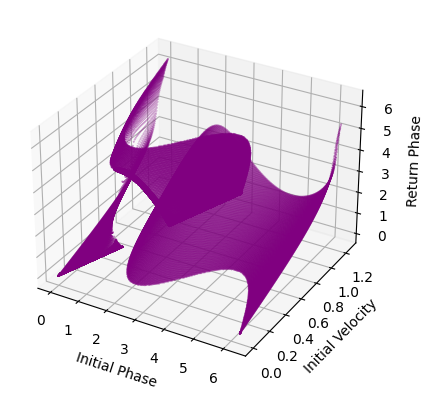

In [9]:
if plot_data:    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('Initial Phase')
    ax.set_ylabel('Initial Velocity')
    ax.set_zlabel('Return Phase')
    ax.scatter(X[:,0], X[:,1], next_impact_phase, c='purple', s=0.1)

### Velocity surface

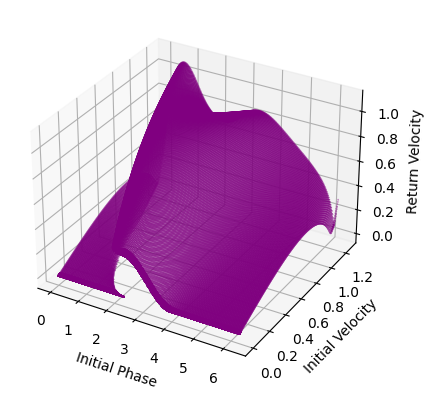

In [10]:
if plot_data:    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:,0], X[:,1], next_impact_velocity, c='purple', s=0.1)
    ax.set_xlabel('Initial Phase')
    ax.set_ylabel('Initial Velocity')
    ax.set_zlabel('Return Velocity')

### Calculate upper and lower bounds
The lower bound on the velocity variable is extended by 0.1.

In [17]:
lower_bounds_init = [np.min(init_impact_phase), np.min(init_impact_velocity)]
upper_bounds_init = [np.max(init_impact_phase), np.max(init_impact_velocity)]
print('Lower init bounds: ', lower_bounds_init)
print('Upper init bounds ', upper_bounds_init)

lower_next_bounds = [np.min(next_impact_phase), np.min(next_impact_velocity)]
upper_next_bounds = [np.max(next_impact_phase), np.max(next_impact_velocity)]
print('Lower next bounds ', lower_next_bounds)
print('Upper next bounds ', upper_next_bounds)

lower_bounds = [min(lower_bounds_init[0], lower_next_bounds[0]), min(lower_bounds_init[1], lower_next_bounds[1])]
upper_bounds = [max(upper_bounds_init[0], upper_next_bounds[0]), max(upper_bounds_init[1], upper_next_bounds[1])]
print('Lower bounds:', lower_bounds)
print('Upper bounds:', upper_bounds)

lower_bounds = [0, 0]
#upper_bounds = [6.275, 1.25]
upper_bounds = [6.2828542917900005, 1.25]


Lower init bounds:  [-0.7, 0.02]
Upper init bounds  [5.6, 1.25]
Lower next bounds  [1.5055208e-05, 0.0021632312]
Upper next bounds  [6.2831837, 0.93722771]
Lower bounds: [-0.7, 0.0021632312]
Upper bounds: [6.2831837, 1.25]


### Persistence to identify potential discontinuities

working on  Rect(-0.7, -0.574, 0.02, 0.0446)
ratio:  0.9991897883340162
None
working on  Rect(-0.7, -0.574, 0.0446, 0.0692)
ratio:  0.9982930506101382
None
working on  Rect(-0.7, -0.574, 0.0692, 0.0938)
ratio:  0.9968941970915614
None
working on  Rect(-0.7, -0.574, 0.09380000000000001, 0.1184)
ratio:  0.9964012894294202
None
working on  Rect(-0.7, -0.574, 0.1184, 0.14300000000000002)
ratio:  0.9953929561257071
None
working on  Rect(-0.7, -0.574, 0.143, 0.1676)
ratio:  0.9948598561937927
None
working on  Rect(-0.7, -0.574, 0.1676, 0.1922)
ratio:  0.9942648156475075
None
working on  Rect(-0.7, -0.574, 0.19219999999999998, 0.2168)
ratio:  0.0013122405656389477
x_small 6.166473
x_large 6.2612107
x_small 6.166473
x_large 6.166473
[6.866473, -0.6612107000000007]
[6.866473, -0.5664730000000002]
working on  Rect(-0.7, -0.574, 0.2168, 0.2414)
ratio:  0.0013101388214444088
x_small 0.017780697
x_large 6.2206969
x_small 6.2206969
x_large 6.2587196
[0.7177806969999999, -0.6206969000000004]
[6.92069

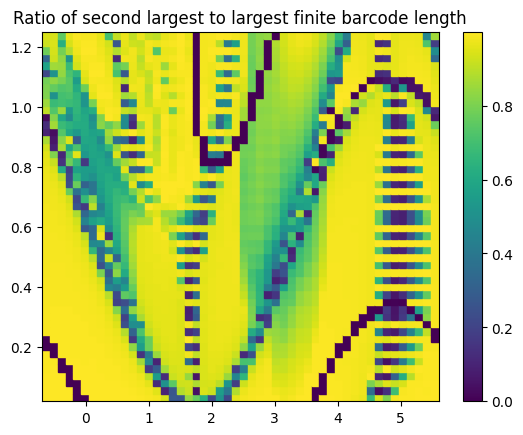

In [19]:
boxes = Boxes(lower_bounds_init, upper_bounds_init, 50, phase_periodic=True)
boxes.plot(init_data, next_data, method='persistence')

### Conley-Morse graph

Here we use a periodic boundary condition on the phase variable.

In [13]:
F = CMGDB_utils.BoxMapData(X, Y, multi_box=True, box_size=0.02)

In [14]:
#data = np.concatenate((X,Y),axis=1)

# k is the padding variable
#k = 0.5

# grid = Grid.Grid(lower_bounds, upper_bounds, sb)

# id2image = grid.id2image(data)

# MG_util = CMGDB_util.CMGDB_util()

# uniform padding for each dimension
#K=[k, k]
# def F(rect):
#     # return MG_util.F_data(rect, id2image, grid.point2cell, K)
#     return MG_util.F_data_enforce_bounds(rect, id2image, grid.point2cell, K, lower_bounds, upper_bounds, phase_periodic, verbose=True)

F = CMGDB.BoxMapData(X, Y, map_empty='terminate', padding=True)

subdiv_min = 13
subdiv_max = 14
subdiv_init = 12
subdiv_limit = 10000
phase_periodic = [False, False]

model = CMGDB.Model(subdiv_min, subdiv_max, subdiv_init, subdiv_limit, lower_bounds, upper_bounds, phase_periodic, F)

morse_graph, map_graph = CMGDB.ComputeConleyMorseGraph(model)

CMGDB.PlotMorseGraph(morse_graph)

NameError: name 'CMGDB' is not defined

### Morse sets

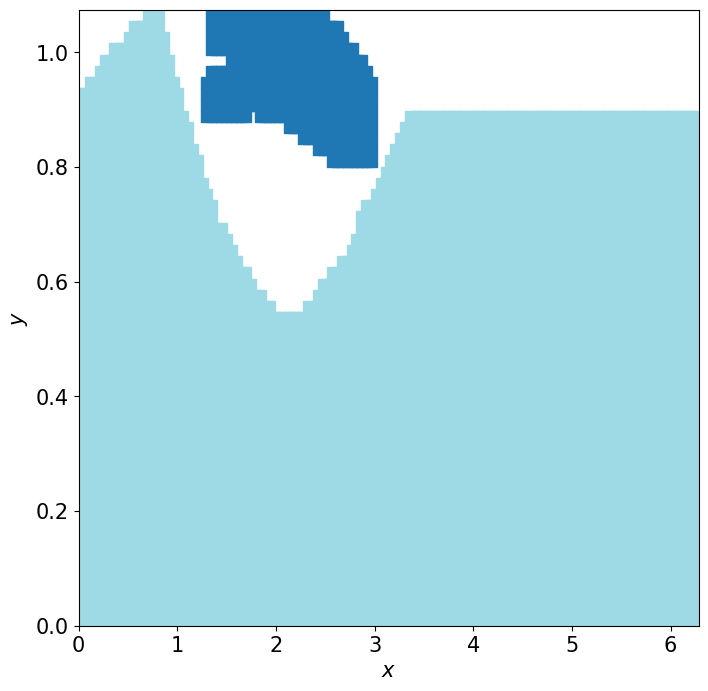

In [ ]:
CMGDB.PlotMorseSets(morse_graph)

### Gaussian process


##### Subsample data

In [ ]:
# Load original data
# init_data_file = 'data/vp_ic11all.dat'
# next_data_file = 'data/vp_next11all.dat'

# init_data = np.loadtxt(init_data_file)
# next_data = np.loadtxt(next_data_file)

# X = init_data[:, [0, 1]]
# Y = next_data[:, [0, 1]]

num_data = 3000
idx = np.random.choice(X.shape[0], num_data, replace=False)
X = X[idx]
Y = Y[idx]

In [ ]:
def GP(X_train, Y_train):
    kernel = RBF()#Matern(nu = 1.5)
    gp = GaussianProcessRegressor(kernel=kernel)
    gp.fit(X_train, Y_train)
    return gp

In [ ]:
gp = GP(X, Y)

def f(X):
    prediction = gp.predict([X])[0]
   # prediction[0] = prediction[0] % (6.2828711)
    return prediction

Compute_Morse_Graph. Initializing root MorseDecomposition
Compute_Morse_Graph. A phase_space -> size () == 16384
Compute_Morse_Graph. B phase_space -> size () == 16513
Total Grid Memory (can be external) = 1521856
Max Memory For Single Grid (must be internal)= 1245406
Max SCC Random Access memory use (must be internal)= 139264
Max SCC stack memory use (can be external memory) = 114400
 ---- SUMMARY ---- 
Internal Memory Requirement = 1384670
External Memory Requirement = 1636256
Max graph memory size (never stored, however) = 6614912
ConleyIndex: calling RelativeMapHomology.
Dimension 0:
 Matrix is 1 x 1
[ 1 ]
ConleyIndex: calling RelativeMapHomology.
Dimension 1:
 Matrix is 1 x 1
[ 0 ]
ConleyIndex: calling RelativeMapHomology.
Dimension 1:
 Matrix is 1 x 1
[ 0 ]
Dimension 2:
 Matrix is 9 x 9
[ 0  0  0  0  0  0  0  0  0 ]
[ 0  0  0  0  0  0  0  0  0 ]
[ 0  0  0  0  0  0  0  0  0 ]
[ 0  0  0  0  0  0  0  0  0 ]
[ 0  0  0  0  0  0  0  0  0 ]
[ 0  0  0  0  0  0  0  0  0 ]
[ 0  0  0  0  0 

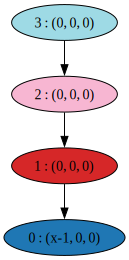

In [ ]:
def F(rect):
    return CMGDB.BoxMap(f, rect, padding=True)

subdiv_min = 15
subdiv_max = 20
init_subdivision = 14
subdivision_limit = 10000

model = CMGDB.Model(subdiv_min, subdiv_max, init_subdivision, subdivision_limit, lower_bounds, upper_bounds, F)

morse_graph, map_graph = CMGDB.ComputeConleyMorseGraph(model)

graph = CMGDB.PlotMorseGraph(morse_graph)

CMGDB.PlotMorseGraph(morse_graph)


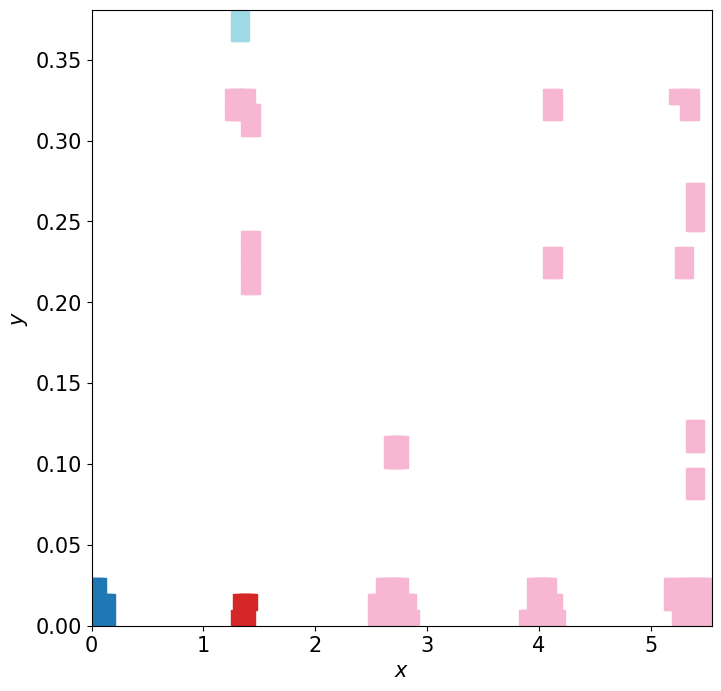

In [ ]:
CMGDB.PlotMorseSets(morse_graph)

In [ ]:
# Reload data so that you can run the GP with a different subsample

init_data_file = 'data/vp_ic11all.dat'
next_data_file = 'data/vp_next11all.dat'

init_data = np.loadtxt(init_data_file)
next_data = np.loadtxt(next_data_file)

X = init_data[:, [0, 1]]
Y = next_data[:, [0, 1]]
Y[:, 0] = Y[:, 0] % (6.2828711)

num_data = 1000
idx = np.random.choice(X.shape[0], num_data, replace=False)
X = X[idx]
Y = Y[idx]

gp = GP(X, Y)

def f(X):
    prediction = gp.predict([X])[0]
   # prediction[0] = prediction[0] % (6.2828711)
    return prediction

def F(rect):
    return CMGDB.BoxMap(f, rect, padding=True)

subdiv_min = 18
subdiv_max = 22
init_subdivision = 12
subdivision_limit = 10000

model = CMGDB.Model(subdiv_min, subdiv_max, init_subdivision, subdivision_limit, lower_bounds, upper_bounds, F)

morse_graph, map_graph = CMGDB.ComputeConleyMorseGraph(model)

graph = CMGDB.PlotMorseGraph(morse_graph)

Compute_Morse_Graph. Initializing root MorseDecomposition
Compute_Morse_Graph. A phase_space -> size () == 4096
Compute_Morse_Graph. B phase_space -> size () == 69177
Total Grid Memory (can be external) = 16881784
Max Memory For Single Grid (must be internal)= 4013280
Max SCC Random Access memory use (must be internal)= 456875
Max SCC stack memory use (can be external memory) = 1362072
 ---- SUMMARY ---- 
Internal Memory Requirement = 4470155
External Memory Requirement = 18243856
Max graph memory size (never stored, however) = 206809832
ConleyIndex: calling RelativeMapHomology.
Dimension 0:
 Matrix is 1 x 1
[ 1 ]
ConleyIndex: calling RelativeMapHomology.
ConleyIndex: calling RelativeMapHomology.
Dimension 1:
 Matrix is 1 x 1
[ 0 ]
ConleyIndex: calling RelativeMapHomology.
ConleyIndex: calling RelativeMapHomology.
Dimension 2:
 Matrix is 1 x 1
[ 0 ]
ConleyIndex: calling RelativeMapHomology.


In [ ]:
CMGDB.PlotMorseSets(morse_graph)

conleyIndexString.
conleyIndexString. Dimension is 0
conleyIndexString. Wrote the polynomial 0
conleyIndexString. Dimension is 1
conleyIndexString. Wrote the polynomial x^3-x^2-1
conleyIndexString. Dimension is 2
conleyIndexString. Wrote the polynomial 0
conleyIndexString.
conleyIndexString. Dimension is 0
conleyIndexString. Wrote the polynomial 0
conleyIndexString. Dimension is 1
conleyIndexString. Wrote the polynomial x^3-x^2-1
conleyIndexString. Dimension is 2
conleyIndexString. Wrote the polynomial 0
